<a href="https://colab.research.google.com/github/tommybebe/til/blob/master/articles/Why_You_Are_Using_t_SNE_Wrong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reference
- [Why You Are Using t-SNE Wrong
](https://towardsdatascience.com/why-you-are-using-t-sne-wrong-502412aab0c0)

### t-SNE
- 다차원 데이터를 시각화하기 위해 자주 사용되는 기술
- 때문에 2차원으로차원 축소하는 것이 일반적
- 구현에 대한 이해 없이 사용되고 잘못 읽게 될 수 있다. 


### t-SNE의 동작 방식
- non-linear and local way
- Hyper Parameter로 perplexity라는 변수를 사용, 
    - 데이터 포인트 간의 이웃 포인트 개수를 추정, 밀도가 높은 데이터일수록 높은 값 사용
    - 5에서 50 사이의 값 사용 추천
    - 데이터 포인트보다 작은 값을 사용 필수
    - perplexity 값 변경과 변화를 살펴보는 것 필수
- Gradient Descent 사용
    - 적절한 learning rate을 지정하는 것 또한 필수
- [이 아티클 - How to Use t-SNE Effectively
](https://distill.pub/2016/misread-tsne/)을 꼭 볼 것

### 주의사항
- 클러스터의 상대적인 크기를 볼 수 없다. 
- 클러스터 간의 거리는 의미를 가지지 않는다. 
- 포인트들이 무리 짓는 경우, 단순한 노이즈일 수 있다. (주로perplexity 작은 경우)


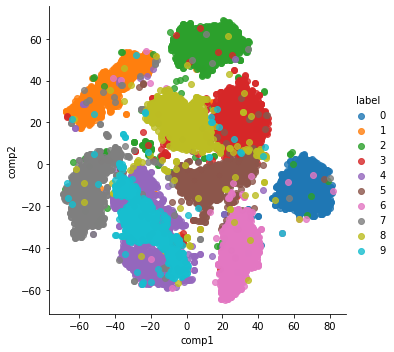

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# get mnist data
mnist = fetch_openml("mnist_784")
X = mnist.data / 255.0
y = mnist.target 

# first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X) 

# randomly sample data to run quickly
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000 

# reduce dimensionality with t-sne
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

# visualize
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)


In [30]:
def draw(args):
    # reduce dimensionality with t-sne
    tsne = TSNE(n_components=2, perplexity=args[0], n_iter=args[1], learning_rate=args[2])
    tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

    # visualize
    df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
    df_tsne['label'] = y[rows[:n_select]]
    sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

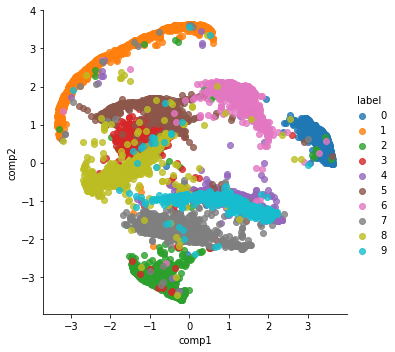

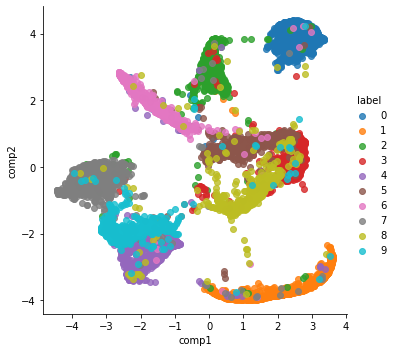

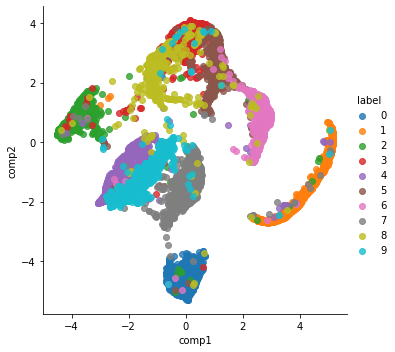

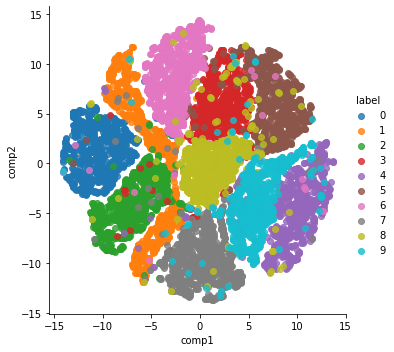

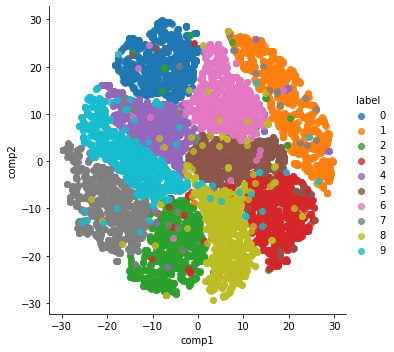

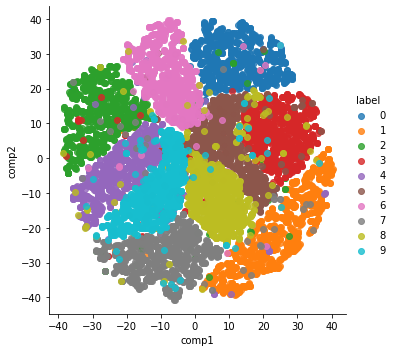

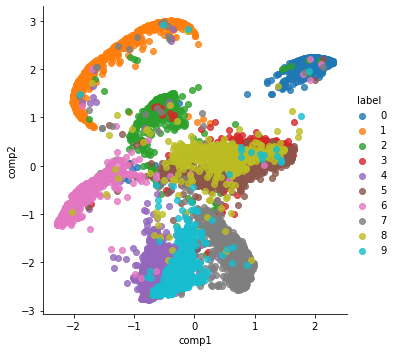

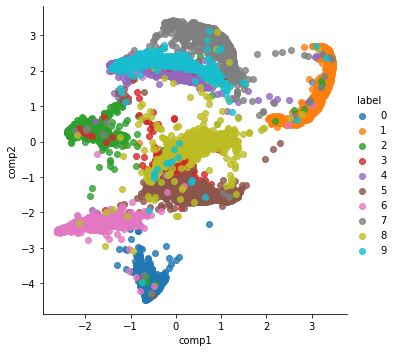

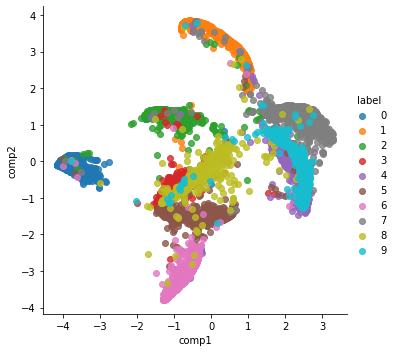

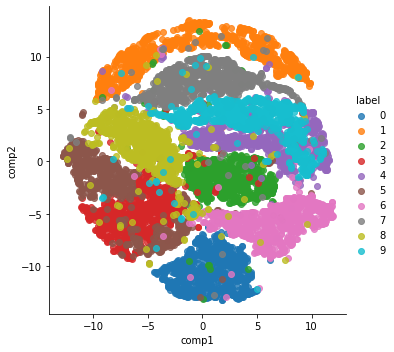

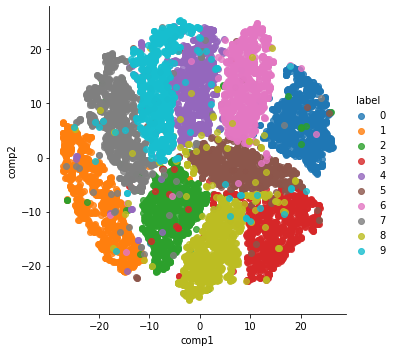

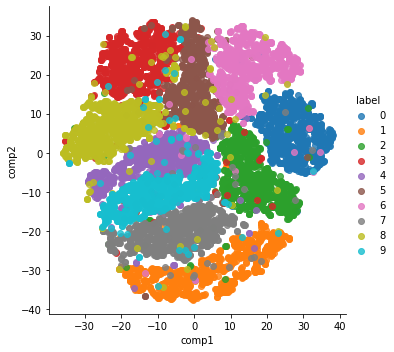

In [32]:
from itertools import permutations, product

perplexity = [5, 10]
n_iter = [250, 500]
lr = [10, 50, 100]

result = list(map(draw, product(perplexity, n_iter, lr)))